# Processos aleatórios

Alguns processos na física são aleatórios em sua natureza, como fenômenos quânticos. Outros são determinísticos, mas podemos tratar como aleatórios dado que não temos o conhecimento completo do estado do sistema. Por exemplo, o movimento browniano. Para simular e fazer cálculos desses tipos de sistemas, é necessário obter números aleatórios num computador. Veja, um computador é uma máquina determinística, isto é, dado um estado inicial e um programa, um computador terá sempre a mesma evolução temporal. Obter números aleatórios num computador parece ser contraditório, mas depende do que queremos fazer com esses números. Na verdade, para as aplicações que vamos analisar, basta termos números que se comportem de forma aleatória o suficiente. Números como esses são chamados de *pseudo*aleatórios.

## Números pseudoaleatórios

Com um programa adequado, um computador pode gerar uma sequência arbitrária de números. Precisamos de um algoritmo que gere uma sequência virtualmente indistinguível de uma sequência aleatória. Tal algoritmo é chamado de gerador de números pseudoaleatórios, ou PRNG.

Uma classe de algoritmos deste tipo são os geradores congruentes lineares (LCG). Eles são baseados na [aritmética modular](https://en.wikipedia.org/wiki/Modular_arithmetic), onde os valores crescem até certo valor, e "dão a volta", indo a zero. O exemplo mais fácil de visualizar é um relógio.

CC BY-SA 3.0 [Spindled](https://commons.wikimedia.org/wiki/File:Clock_group.svg)

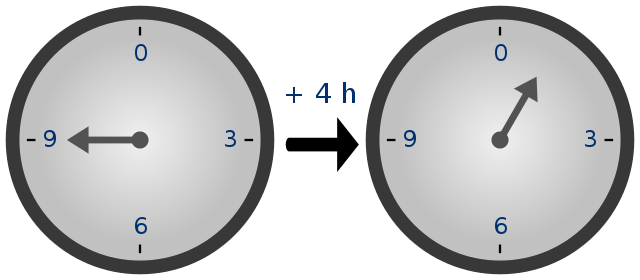

Note que neste relógio não temos o valor 12, e sim 0. O valor 12 é chamado *módulo*. Neste exemplo, 9h mais 4h é igual a 1h (módulo 12). Em aritmética modular, de um jeito informal,

$$
(9 + 4)\ \text{mod}\ 12 = 1.
$$

Nos computadores, os valores inteiros fazem a mesma coisa. Um tipo inteiro positivo de 32 bits pode conter números de $0$ até $2^{32}-1 = 4294967295$. Se uma operação resulta num múmero maior que este, o valor resultante "dá a volta", como acontece no relógio.

Este comportamento dos números inteiros é mascarado em Python. Os tipos inteiros (`int`) são mais elaborados, e virtualmente ilimitados, logo a aritmética modular não se aplica automaticamente. Devemos usar o operador módulo `%`. Repetindo a operação do relógio,

In [ ]:
(9 + 4) % 12

### Geradores congruentes lineares (LCG)

Voltando aos números pseudoaleatórios. O LCG é definido através da relação de recorrência

$$
x_{k+1} = (a x_k + c)\ \text{mod}\ m,
$$

onde $a$, $c$ e $m$ são constantes inteiras, e $x_k$ são os números inteiros gerados pelo LCG. O valor inicial $x_0$ é chamado de *semente*. Dependendo da semente e dos parâmetros $a$, $c$ e $m$, temos várias sequências possíveis. A maioria das combinações de parâmetros produzem sequências pobres, que não passam em testes de aleatoriedade (como o [teste espectral](https://en.wikipedia.org/wiki/Spectral_test)). Entretanto, alguns conjuntos de parâmetros geram sequências que são muito parecidas com uma sequência de número aleatórios. Veja o artigo por [Steele & Vigna (2001)](https://arxiv.org/abs/2001.05304) para entender como esses "números mágicos" podem ser encontrados.

Um conjunto particular de parâmetros é $a = 166452$ e $c = 1013904223$, com $m=2^{32}=4294967296$. O número $m$ dita a faixa de valores possíveis, com $0 \leq x_k \leq m-1$. Entretanto, podemos facilmente mudar a faixa de valores, fazendo uma reparametrização. Por exemplo para ter valores de ponto flutuante $y_k$ com $0 \leq y_k \leq 1$, podemos fazer simplesmente $y_k = \frac{x_k}{m - 1}$.

Vamos gerar aguns números dessa sequência, e ver como eles se distribuem.

In [ ]:
import numpy as np

m = 2**32
a = 1664525
c = 1013904223

# Semente.
x = 1

N = 100
r = np.zeros(N, dtype='uint32')
for k in range(N):
    x = (a * x + c) % m
    r[k] = x

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
fig, ax = plt.subplots()
ax.plot(r / (m - 1), 'o')
plt.show()

Podemos visualizar melhor o resultado fazendo um histograma. Veja abaixo uma amostragem de $100$ números aleatórios. Modifique para $1000$, e $10000$ números. Se o PRNG é bom, quanto mais números tomarmos, mais a distribuição deve se aproximar de uma distribuição plana.

In [ ]:
# O estado atual do PRNG fica guardado numa variável global.
# Semente = 1
_estado_LCG = 1

def randint_LCG():
    # Precisamos escrever numa variável global.
    global _estado_LCG
    
    m = 2**32
    a = 1664525
    c = 1013904223
 
    _estado_LCG = (a * _estado_LCG + c) % m
    return _estado_LCG

m = 2**32
N = 100
r = np.zeros(N)
for k in range(N):
    r[k] = randint_LCG() / (m - 1)
    
fig, ax = plt.subplots()
ax.hist(r, bins=20, range=[0, 1],
        density=True, histtype='stepfilled', label=f'N = {N}')
ax.legend()
ax.set_ylim(0, 1.9)
ax.axhline(1, ls='--', color='k')

plt.show()

Repare que, dada uma determinada semente, o PRNG vai produzir sempre a mesma sequência. Execute a célula acima algumas vezes para se convencer disso. Depois, mude `_estado_LCG = 1` para outro valor e e execute novamente a célula. Os histogramas são completamente diferentes. Isto é, lembre sempre de mudar a semente a cada vez que rodar o seu programa, por exemplo usando a data do computador. Por exemplo:

In [ ]:
import time
t = int(time.time())
print(t)
semente = t

### LCG truncado

Outro problema, específico do LCG é que um número nunca se repete. Sequências naturais de números aleatórios têm uma chance de ter números repetidos. Pegue um dado de veja quantos $6$ seguidos você consegue. No LCG, quando $x_k$ voltar a ser o valor da semente, por exemplo, sabemos que a sequência toda vai se repetir. Isto é, a sequência é periódica. Dados suficientes passos, todo PRNG vai repetir a sua sequência. O número de passos necessário para isso é chamado de *período* do PRNG. Na melhor das hipóteses, todos os números do intervalo $0 \leq x_k \leq m-1$ serão visitados, e o períodos nesse caso é $m$.

Para atenuar este problema de repetição de números, vejamos agora uma modificação do LCG, chamada de LCG truncado, ou TLCG. Neste caso, geramos uma sequência de PRNG com um módulo maior do que os números que queremos gerar, e usamos os seus valores truncados pelo módulo desejado. No exemplo abaixo, geramos um PRNG com módulo 16, mas usamos somente o dígito menos significativo (tomando o resultado módulo 10).

In [ ]:
x = 1
m = 16
a = 5
c = 1
for i in range(20):
    x = (a * x + c) % m
    print(f'({i+1}) Estado interno (mod {m}): x = {x:02d}, \
    número aleatório (mod 10): {x % 10}')

Repare como a sequência de números aleatórios tem um período de 16, maior do que esperado com um LCG comum de módulo 10. Também podemos ver números repetidos (5 aparece duas vezes) antes que a sequência reinicie.

Na prática usamos módulos muito maiores para o estado interno de TLGCs, como $2^{96}$ ou $2^{128}$. O resultado é um PRNG com um custo computacional um pouco maior, porém gerando uma sequência muito mais realista. Um gerador muito bom com estado interno de módulo $2^{96}$ está programado abaixo.

In [ ]:
# Estado atual do gerador, com semente = 1.
_estado_LCG_96 = 1

def randint_TLCG():
    global _estado_LCG_96
    
    m = 2**96
    a = 0xDC87976860B11728995DEB95
    _estado_LCG_96 *= a
    
    # O operador módulo mantém o estado atual num tamanho de 96 bits.
    _estado_LCG_96 %= m
    
    # Vamos retornar apenas os 32 bits menos significativos.
    return _estado_LCG_96 % 2**32


Veja que este gerador também nos dá uma distribuição homogênea.

In [ ]:
def rand():
    return randint_TLCG() / (2**32 - 1)

_estado_LCG_96 = 1

fig, ax = plt.subplots(nrows=3, ncols=1)
for i, N in enumerate([100, 1000, 10000]):
    r = np.zeros(N)
    for k in range(N):
        r[k] = rand()
    
    ax[i].hist(r, bins=20, range=[0, 1],
               density=True, histtype='stepfilled', label=f'N = {N}')

    ax[i].legend()
    
    # Etiquetas no eixo x só do último gráfico,
    # pois elas são sempre iguais.
    if i < 2:
        ax[i].set_xticklabels([])
    
    ax[i].set_ylim(0, 1.9)
    ax[i].axhline(1, ls='--', color='k')

plt.show()

## PRNGs no mundo real

Para usos sérios em simulações físicas, PRNGs do tipo LCG puros (o primeiro que vimos) não são indicados. A versão truncada, por outro lado, é perfeitamente adequada. Outro algoritmo simples e prático é o [Linear Feedback Shift Register](https://youtu.be/QGeLzCmUDDk?feature=shared&t=50), usado geralmente em hardware ou porcessadores sem instruções de multiplicação. Um algoritmo historicamente usado para gerar números aleatórios em aplicações científicas é o [*Mersenne twister*](https://en.wikipedia.org/wiki/Mersenne_Twister). A sua implementação é bastante complicada, e não vamos ver aqui. O Mersenne twister é usado em muitas bibliotecas de linguagens de programação conhecidas, inclusive no python. Vejamos como usar as funções de PRNG do python.

In [ ]:
import random

# Definindo a semente.
random.seed(1)

# Um inteiro no intervalo [10, 20], inclusive os limites.
x = random.randint(10, 20)
print(f'x = {x}')

# Float no intervalo [0, 1). Nunca é igual a 1.
y = random.random()
print(f'y = {y}')

Podemos também usar funções do numpy, convenientes para gerar arrays de números aleatórios.

In [ ]:
# 15 elementos no intervalo [10, 20].
# size pode ser uma tupla para arrays multidimensionais.
x = np.random.randint(10, 20, size=15)
print(x)

In [ ]:
# 15 elementos no intervalo [0, 1).
y = np.random.rand(15)
print(y)

Com estas funções é possível fazer quase tudo que precisamos. Existem outras funções de conveniência, veja a [biblioteca do python](https://docs.python.org/3/library/random.html) e a do [numpy](https://numpy.org/doc/stable/reference/random/index.html).